## データ分析のサンプルNotebook

### データの表示

In [1]:
import pandas as pd
customer = pd.read_csv('customer.csv')
customer.head()

,顧客ID,顧客名,性別,年齢
0,1,田中,男,21
1,2,斎藤,女,32
2,3,山田,女,56
3,4,佐藤,男,43
4,5,北野,男,23


In [2]:
item = pd.read_csv('item.csv')
item.head()

,商品ID,商品名,金額
0,1,りんご,100
1,2,みかん,100
2,3,チョコレート,200
3,4,牛乳,250
4,5,チーズ,300


In [3]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,1,2020/01/01,1,100,2,1
1,2,2020/01/01,1,200,2,2
2,3,2020/01/03,5,100,6,1
3,4,2020/01/04,5,500,4,2
4,5,2020/01/10,7,100,1,1


In [4]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_2.head()

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,9,2020/02/01,6,200,3,1
1,10,2020/02/03,1,100,2,1
2,11,2020/02/08,4,100,1,1
3,12,2020/02/10,1,100,2,1
4,13,2020/02/12,1,300,6,3


### データの連結

In [5]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,1,2020/01/01,1,100,2,1
1,2,2020/01/01,1,200,2,2
2,3,2020/01/03,5,100,6,1
3,4,2020/01/04,5,500,4,2
4,5,2020/01/10,7,100,1,1
5,6,2020/01/11,2,250,4,1
6,7,2020/01/13,3,300,5,1
7,8,2020/01/18,2,500,5,2
8,9,2020/02/01,6,200,3,1
9,10,2020/02/03,1,100,2,1


In [6]:
transaction = pd.concat([transaction_1, transaction_2])
transaction.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6], dtype='int64')

### データの結合（ジョイン）

In [7]:
sales_data = pd.merge(transaction, customer, on='顧客ID')
sales_data

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数,顧客名,性別,年齢
0,1,2020/01/01,1,100,2,1,田中,男,21
1,2,2020/01/01,1,200,2,2,田中,男,21
2,10,2020/02/03,1,100,2,1,田中,男,21
3,12,2020/02/10,1,100,2,1,田中,男,21
4,13,2020/02/12,1,300,6,3,田中,男,21
5,3,2020/01/03,5,100,6,1,北野,男,23
6,4,2020/01/04,5,500,4,2,北野,男,23
7,5,2020/01/10,7,100,1,1,岡田,女,44
8,14,2020/02/18,7,100,6,1,岡田,女,44
9,15,2020/02/18,7,200,3,1,岡田,女,44


In [8]:
sales_data2 = pd.merge(customer, transaction, on='顧客ID')
sales_data2

,顧客ID,顧客名,性別,年齢,購買ID,購買日,購買金額,商品ID,購入数
0,1,田中,男,21,1,2020/01/01,100,2,1
1,1,田中,男,21,2,2020/01/01,200,2,2
2,1,田中,男,21,10,2020/02/03,100,2,1
3,1,田中,男,21,12,2020/02/10,100,2,1
4,1,田中,男,21,13,2020/02/12,300,6,3
5,2,斎藤,女,32,6,2020/01/11,250,4,1
6,2,斎藤,女,32,8,2020/01/18,500,5,2
7,3,山田,女,56,7,2020/01/13,300,5,1
8,4,佐藤,男,43,11,2020/02/08,100,1,1
9,5,北野,男,23,3,2020/01/03,100,6,1


## groupby()で、顧客IDごとに購買金額と購入数を表示

In [9]:
sales_per_customer = sales_data.groupby('顧客ID')['購買金額', '購入数'].sum()
sales_per_customer

,購買金額,購入数
顧客ID,,
1,800,8
2,750,3
3,300,1
4,100,1
5,600,3
6,200,1
7,400,3


In [10]:
sample_analysis = sales_data.groupby(['購買日', '年齢'])['購買金額', '購入数'].sum()
sample_analysis

,,購買金額,購入数
購買日,年齢,,
2020/01/01,21,300,3
2020/01/03,23,100,1
2020/01/04,23,500,2
2020/01/10,44,100,1
2020/01/11,32,250,1
2020/01/13,56,300,1
2020/01/18,32,500,2
2020/02/01,24,200,1
2020/02/03,21,100,1


In [13]:
sales_per_customer_data2 = transaction.groupby('顧客ID')['購買金額', '購入数']
print(type(sales_per_customer_data2))
print(sales_per_customer_data2)

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


## groupby()で、購買日ごとの平均売上を表示

In [22]:
sales_per_day = sales_data.groupby('購買日').購買金額.mean()
sales_per_day

購買日
2020/01/01    150
2020/01/03    100
2020/01/04    500
2020/01/10    100
2020/01/11    250
2020/01/13    300
2020/01/18    500
2020/02/01    200
2020/02/03    100
2020/02/08    100
2020/02/10    100
2020/02/12    300
2020/02/18    150
Name: 購買金額, dtype: int64

## 顧客ごとの売上を棒グラフで表示

In [15]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure()
plt.xlabel('日本語だよ')

Text(0.5, 0, '日本語だよ')

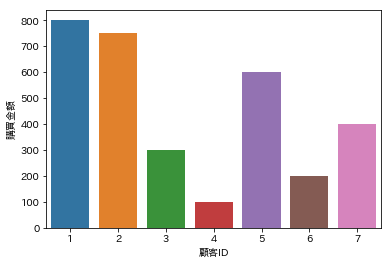

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'IPAexGothic'

ax = sns.barplot(x=sales_per_customer.index, y='購買金額', data=sales_per_customer)

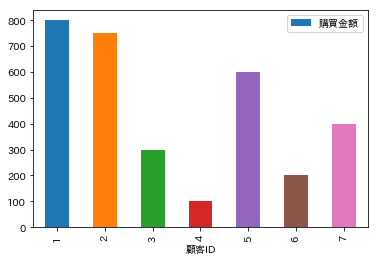

In [19]:
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'IPAexGothic'

sales_per_customer.plot.bar(y='購買金額')

## 購買日ごとの合計売上金額を折れ線グラフで表示

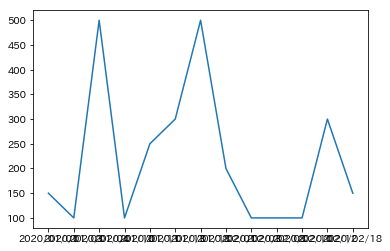

In [19]:
ax = sns.lineplot(data=sales_per_day)

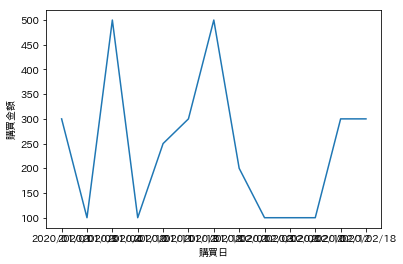

In [43]:
# 上の可視化は、この内容と同じ
# sales_per_day = transaction.groupby('購買日')['購買金額', '購入数'].sum()
# ax = sns.lineplot(x=sales_per_day.index, y='購買金額', data=sales_per_day)

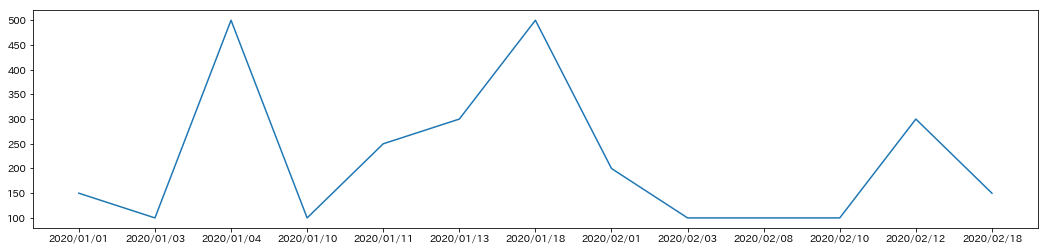

In [21]:
plt.figure(figsize=(18,4))
ax = sns.lineplot(data=sales_per_day)

[Text(0, 0.5, '平均売上（円）'), Text(0.5, 0, '購買日')]

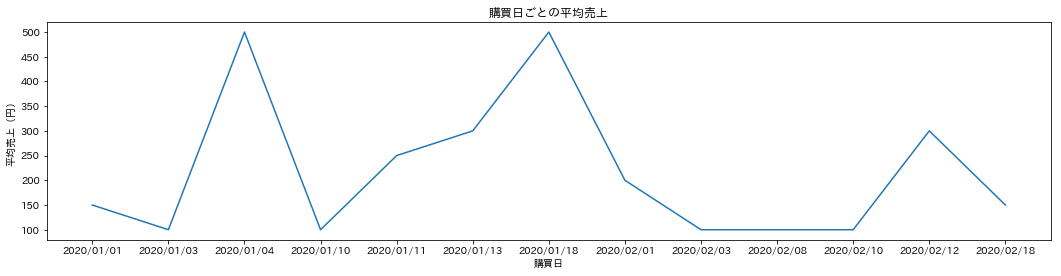

In [42]:
plt.figure(figsize=(18,4))
ax = sns.lineplot(data=sales_per_day)
ax.set_title('購買日ごとの平均売上')
ax.set(xlabel ='購買日', ylabel='平均売上（円）' )